# Maps HW Assignment

# Step 1 : Imports and data

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from pyproj import CRS
from geopy.geocoders import Nominatim

# Step 2 : Data sets

You will need to read the following datasets in to Pandas DataFrames:

snowstorm_PA.tsv

PA_cities_counties.tsv

This will give you weather data for the snowstorm of Jan 16 2022. Remember to use sep='\t' in your pd.read_csv commands.


Got the tsv files from the github

In [ ]:
snowstorm_data=pd.read_csv('snowstorm_PA.tsv',sep='\t')
PA_data=pd.read_csv('PA_cities_counties.tsv',sep='\t')

These are now Geodata files that we will put in as GeoPandas Geodataframes.

tl_2021_us_county.zip

PaMunicipalities2022_01.zip

I downloaded them from Canvas and uploaded to the notebook, but I can also read in the zip file.

In [ ]:
gdf = gpd.read_file('tl_2021_us_county.zip')
PA = gpd.read_file('PaMunicipalities2022_01.zip')

In [ ]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,coords
8,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694582,23299110,+39.5769252,-120.5219926,"POLYGON ((-120.55587 39.50874, -120.55614 39.5...",0.261249,"(-120.5106542, 39.583854)"
325,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2500045887,75340560,+38.4501363,-121.3443291,"POLYGON ((-121.43991 38.25553, -121.44002 38.2...",0.265777,"(-121.27568956238274, 38.377481)"
329,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7080860229,2729213507,+34.5366774,-120.0383645,"MULTIPOLYGON (((-120.58226 34.10752, -120.5790...",0.963363,"(-120.0636680929737, 34.7202565)"
346,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641837359,43789489,+38.1910682,-120.5541065,"POLYGON ((-120.37620 38.14265, -120.37616 38.1...",0.276235,"(-120.65718751116114, 38.171181000000004)"
394,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4767622161,947345735,+34.3587477,-119.1331453,"MULTIPOLYGON (((-119.63607 33.28071, -119.6347...",0.560025,"(-119.07724799583681, 34.447038000000006)"


In [ ]:
gdf = gdf[gdf.STATEFP=='42']  # select PA

In [ ]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
19,42,007,01214112,42007,Beaver,Beaver County,06,H1,G4020,430,38300,None,A,1125854819,24162295,+40.6841401,-080.3507209,"POLYGON ((-80.27803 40.53674, -80.29151 40.527..."
47,42,053,01213669,42053,Forest,Forest County,06,H1,G4020,None,None,None,A,1106595595,8369675,+41.5133040,-079.2497050,"POLYGON ((-78.95860 41.52549, -78.95861 41.525..."
95,42,117,01209189,42117,Tioga,Tioga County,06,H1,G4020,None,None,None,A,2936765818,8279717,+41.7668593,-077.2572881,"POLYGON ((-77.21159 41.54545, -77.21177 41.545..."
108,42,043,01213667,42043,Dauphin,Dauphin County,06,H1,G4020,276,25420,None,A,1359407363,86209037,+40.4125646,-076.7926343,"POLYGON ((-76.59217 40.25428, -76.59214 40.254..."
165,42,127,01213692,42127,Wayne,Wayne County,06,H1,G4020,None,None,None,A,1879734030,64785676,+41.6466021,-075.2924932,"POLYGON ((-75.29834 41.36740, -75.29849 41.367..."


# Step 3 : Copy in some utilities

Copy in the following functions from the geopandas_experiments.ipynb notebook, for convenience:

add_area_and_label_coords()

plot_with_labels()

calc_overall_centroid()

haversine_np() (from the lecture notes)



# Convenience function to add some commonly used attributes

* *GeoSeries.area* just returns the area
* See [GeoSeries.representative_point](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.representative_point.html) . The end result is that the __coords__ column contains a point within the boundaries of the region.



In [ ]:
def add_area_and_label_coords(some_gdf):
    some_gdf['area'] = some_gdf.area
    some_gdf['coords'] = some_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
    some_gdf['coords'] = [coords[0] for coords in some_gdf['coords']]

In [ ]:
def plot_with_labels(some_gdf, ax, name_col=None, field_col=None, **kwargs):
    if field_col is None:
        some_gdf.plot(ax=ax, **kwargs)
    else:
        some_gdf.plot(column=field_col, ax=ax, legend=True, **kwargs)
    if name_col is not None:
        for idx, row in some_gdf.iterrows():
            ax.annotate(text=row[name_col], xy=row['coords'],
                         horizontalalignment='center')

In [ ]:
def calc_overall_centroid(some_gdf):
    """
    Use the 'coords' and 'area' columns to estimate an overall centroid
    """
    sum_x = 0.0
    sum_y = 0.0
    sum_area = 0.0
    for idx, row in some_gdf.iterrows():
        coord_x, coord_y = row['coords']
        sum_x += coord_x * row['area']
        sum_y += coord_y * row['area']
        sum_area += row['area']
    centroid_x = sum_x / sum_area
    centroid_y = sum_y / sum_area
    return centroid_x, centroid_y

In [ ]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees).  All args
    must be of equal length.
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

# Step 4 : Set up an Ortho Projection for PA

Select the geometry for Pennsylvania from the GeoDataFrame. The FIPS code for PA is 42.
Set up an orthographic projection for PA, just as we did in geopandas_experiments.ipynb. Set the CRS for the GeoDataFrame.

In [ ]:
#gdf = gdf[gdf.STATEFP=='42']  # select PA instead of CA

In [ ]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
19,42,007,01214112,42007,Beaver,Beaver County,06,H1,G4020,430,38300,None,A,1125854819,24162295,+40.6841401,-080.3507209,"POLYGON ((-80.27803 40.53674, -80.29151 40.527..."
47,42,053,01213669,42053,Forest,Forest County,06,H1,G4020,None,None,None,A,1106595595,8369675,+41.5133040,-079.2497050,"POLYGON ((-78.95860 41.52549, -78.95861 41.525..."
95,42,117,01209189,42117,Tioga,Tioga County,06,H1,G4020,None,None,None,A,2936765818,8279717,+41.7668593,-077.2572881,"POLYGON ((-77.21159 41.54545, -77.21177 41.545..."
108,42,043,01213667,42043,Dauphin,Dauphin County,06,H1,G4020,276,25420,None,A,1359407363,86209037,+40.4125646,-076.7926343,"POLYGON ((-76.59217 40.25428, -76.59214 40.254..."
165,42,127,01213692,42127,Wayne,Wayne County,06,H1,G4020,None,None,None,A,1879734030,64785676,+41.6466021,-075.2924932,"POLYGON ((-75.29834 41.36740, -75.29849 41.367..."


In [ ]:
add_area_and_label_coords(gdf)
centroid_x, centroid_y = calc_overall_centroid(gdf)
print(centroid_x, centroid_y)

-77.84058346055701 40.900430189750736


<ipython-input-111-826e582dea62>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  some_gdf['area'] = some_gdf.area


<ipython-input-144-2f51b8b3bb52>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axes = plt.subplots(1,2)


Text(0.5, 0.98, 'Original CRS')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

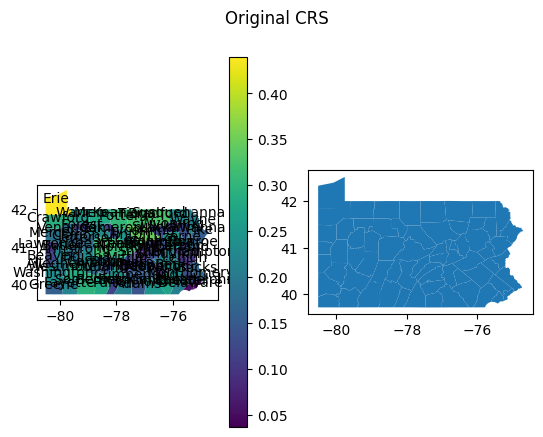

In [ ]:
fig, axes = plt.subplots(1,2)
plot_with_labels(gdf, field_col='area', name_col='NAME', ax=axes[0])
plot_with_labels(gdf, ax=axes[1])
fig.suptitle('Original CRS')

Now, let's work on changing it to ortho

Setting CRS

In [ ]:
gdf.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
lat = centroid_y
lon = centroid_x
ortho = CRS.from_proj4("+proj=ortho +lat_0={} +lon_0={} +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs".format(lat, lon))

Converting the coordinates to this new CRS

In [ ]:
ortho_gdf = gdf.to_crs(ortho)
ortho_gdf.crs

<Projected CRS: +proj=ortho +lat_0=40.900430189750736 +lon_0=-77.8 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unknown
- method: Orthographic
Datum: Unknown based on Normal Sphere (r=6370997) ellipsoid
- Ellipsoid: Normal Sphere (r=6370997)
- Prime Meridian: Greenwich

Text(0.5, 0.98, 'Ortho')

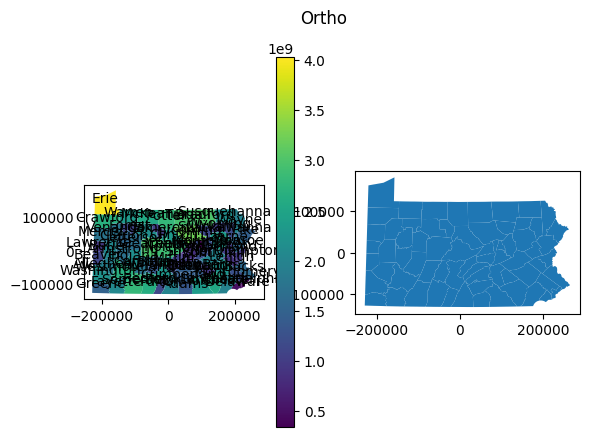

In [ ]:
add_area_and_label_coords(ortho_gdf)
fig, axes = plt.subplots(1,2)
plot_with_labels(ortho_gdf, field_col='area', name_col='NAME', ax=axes[0])
plot_with_labels(ortho_gdf, ax=axes[1])
fig.suptitle('Ortho')

In [ ]:
# fips_gdf = gpd.read_file('tl_2021_us_county.shp')
# display(fips_gdf.columns)
# fips_gdf = fips_gdf[fips_gdf.STATEFP=='42']  # select PA
# add_area_and_label_coords(fips_gdf)

Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry'],
      dtype='object')

<ipython-input-111-826e582dea62>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  some_gdf['area'] = some_gdf.area


# Step 5 : Estimating County-wide snowfall numbers

We are interested in the 'Expected Snowfall' values from the snowfall dataset. However, we only have that data for cities, and we need to plot by counties. You can get averages for counties by:

1. Merge the snowstorm dataframe with the cities-and-counties dataframe, using the city name as the merge key. Note that there are many cities for which we have no snowfall estimate, so there will be a lot of missing snowfall data.

2. Rather than give up on those cities, you can use the Nominatim geocoder to get county information for most of them, as follows.
Use the geocoder to look up {Location} Pennsylvania US , where {Location} is that entry in a particular row.
Convert the result to a string. Almost all of them are of the format: "Some City, CountyName County, ..."

3. Use the Python string split method to separate that string at the commas. Find the substring that contains the word 'County'. Separate off the first word of that substring. That word will be the county name.

4. Insert those county names in the dataframe where they are needed. Some may still be empty, but most cities will now have county information.
Prune the resulting dataframe down to only the columns you need.

5. Group the dataframe by county and take the mean. This will handle counties with more than one named city by averaging over their snowfall estimates.

Now you should have a dataframe with county names and estimated snowfall values.

Let's see how the snowstorm data and cities_and_counties data looks

In [ ]:
snowstorm_data.head(30)

,Location,Low End Snowfall,Expected Snowfall,High End Snowfall,"P>=0.1""","P>=1""","P>=2""","P>=4""","P>=6""","P>=8""","P>=12""","P>=18"""
0,Bethel Park,8,12,15,100%,100%,100%,98%,94%,83%,40%,1%
1,Franklin Park,8,13,16,100%,100%,100%,99%,96%,88%,51%,3%
2,Jefferson Hills,7,11,14,100%,100%,100%,98%,93%,80%,31%,1%
3,Monroeville,7,10,14,100%,100%,100%,99%,94%,81%,32%,1%
4,Moon/Pittsburgh Intl Airport,9,13,16,100%,100%,100%,99%,97%,91%,56%,4%
5,Mount Lebanon,8,12,15,100%,100%,100%,98%,94%,84%,42%,1%
6,Penn Hills,7,11,15,100%,100%,100%,99%,95%,83%,37%,2%
7,Pittsburgh,8,12,15,100%,100%,100%,99%,95%,85%,42%,1%
8,Apollo,7,9,14,100%,100%,100%,99%,94%,78%,28%,1%
9,Ford City,7,9,14,100%,100%,100%,99%,95%,80%,28%,1%


In [ ]:
PA_data.head(30)

,Name,Type,County,Class,Population (2018 Estimates),Incorporation date (as city),Sq Miles
0,Aliquippa,City,Beaver,Third,8908,1987,4.19
1,Allentown,City,Lehigh,Third,123828,1867,17.55
2,Altoona,City,Blair,Third,43702,1868,9.91
3,Arnold,City,Westmoreland,Third,4980,1939,0.73
4,Beaver Falls,City,Beaver,Third,8387,1928,2.13
5,Bethlehem,City,Lehigh + Northampton,Third,77283,1917,19.10
6,Bloomsburg,Town,Columbia,Third,14536,1929,4.35
7,Bradford,City,McKean,Third,8305,1879,3.35
8,Butler,City,Butler,Third,13107,1918,2.72
9,Carbondale,City,Lackawanna,Third,8447,1851,3.24


In [ ]:
merged_df = snowstorm_data.merge(PA_data, left_on='Location', right_on='Name', how='left')

merged_df.head(30)


,Location,Low End Snowfall,Expected Snowfall,High End Snowfall,"P>=0.1""","P>=1""","P>=2""","P>=4""","P>=6""","P>=8""","P>=12""","P>=18""",Name,Type,County,Class,Population (2018 Estimates),Incorporation date (as city),Sq Miles
0,Bethel Park,8,12,15,100%,100%,100%,98%,94%,83%,40%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Franklin Park,8,13,16,100%,100%,100%,99%,96%,88%,51%,3%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jefferson Hills,7,11,14,100%,100%,100%,98%,93%,80%,31%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Monroeville,7,10,14,100%,100%,100%,99%,94%,81%,32%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Moon/Pittsburgh Intl Airport,9,13,16,100%,100%,100%,99%,97%,91%,56%,4%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Mount Lebanon,8,12,15,100%,100%,100%,98%,94%,84%,42%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Penn Hills,7,11,15,100%,100%,100%,99%,95%,83%,37%,2%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Pittsburgh,8,12,15,100%,100%,100%,99%,95%,85%,42%,1%,Pittsburgh,City,Allegheny,Second,302407.0,1816.0,55.37
8,Apollo,7,9,14,100%,100%,100%,99%,94%,78%,28%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ford City,7,9,14,100%,100%,100%,99%,95%,80%,28%,1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import time
# Use Nominatim geocoder to get county information for missing cities
geolocator = Nominatim(user_agent="geo_lookup")

# Apply the geocoder to fill missing county names directly
missing_county_indices = merged_df[merged_df['County'].isnull()].index

for index in missing_county_indices:
    location = merged_df.loc[index, 'Location']
    try:
        result = geolocator.geocode(f"{location}, Pennsylvania, USA")
        if result:
            # Convert the result to a string and extract county name
            location_info = str(result)
            county_name = [s.strip() for s in location_info.split(',') if 'County' in s][0].split()[0]
            merged_df.at[index, 'County'] = county_name
    except:
        pass


Had to edit the above code a lot, the merge wasn't including the NaN and it was leaving some of the counties off. It's the reason why I have set head(20), because I only had 9 counties showing up in previous version of the code.

In [ ]:
# Prune the dataframe to only needed columns
pruned_df = merged_df[['County', 'Expected Snowfall']]

# Step 4: Group by county and take the mean
result_df = pruned_df.groupby('County').mean().reset_index()

result_df.head(20)

,County,Expected Snowfall
0,Allegheny,11.571429
1,Armstrong,9.500000
2,Beaver,12.500000
3,Butler,12.200000
4,Clarion,11.500000
5,Clearfield,10.000000
6,Fayette,9.666667
7,Forest,12.000000
8,Greene,9.800000
9,Huntingdon,9.000000


# Step 6 : Merge the snowfall data into GeoDataFrame

Be careful to do the merge in such a way that counties with no snowfall data stay in the GeoDataFrame, but with 'NaN' values for 'Estimated Snowfall'. We want to use those records to draw the counties outside the snowstorm area.



In [ ]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,coords
19,42,007,01214112,42007,Beaver,Beaver County,06,H1,G4020,430,38300,None,A,1125854819,24162295,+40.6841401,-080.3507209,"POLYGON ((-80.27803 40.53674, -80.29151 40.527...",0.122502,"(-80.33356401630434, 40.6665865)"
47,42,053,01213669,42053,Forest,Forest County,06,H1,G4020,None,None,None,A,1106595595,8369675,+41.5133040,-079.2497050,"POLYGON ((-78.95860 41.52549, -78.95861 41.525...",0.120257,"(-79.23552915941254, 41.475388499999994)"
95,42,117,01209189,42117,Tioga,Tioga County,06,H1,G4020,None,None,None,A,2936765818,8279717,+41.7668593,-077.2572881,"POLYGON ((-77.21159 41.54545, -77.21177 41.545...",0.318905,"(-77.25034505294256, 41.771712)"
108,42,043,01213667,42043,Dauphin,Dauphin County,06,H1,G4020,276,25420,None,A,1359407363,86209037,+40.4125646,-076.7926343,"POLYGON ((-76.59217 40.25428, -76.59214 40.254...",0.153387,"(-76.83720556170019, 40.389572)"
165,42,127,01213692,42127,Wayne,Wayne County,06,H1,G4020,None,None,None,A,1879734030,64785676,+41.6466021,-075.2924932,"POLYGON ((-75.29834 41.36740, -75.29849 41.367...",0.210166,"(-75.26130220558844, 41.616035999999994)"


Seems like in gdf, its the "NAME" column and in our snowfall data that we just created, it's "County"

In [ ]:
PA = gdf.merge(result_df, left_on='NAME', right_on='County', how='left')

PA.head(10)

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,area,coords,County,Expected Snowfall
0,42,007,01214112,42007,Beaver,Beaver County,06,H1,G4020,430,...,A,1125854819,24162295,+40.6841401,-080.3507209,"POLYGON ((-80.27803 40.53674, -80.29151 40.527...",0.122502,"(-80.33356401630434, 40.6665865)",Beaver,12.5
1,42,053,01213669,42053,Forest,Forest County,06,H1,G4020,None,...,A,1106595595,8369675,+41.5133040,-079.2497050,"POLYGON ((-78.95860 41.52549, -78.95861 41.525...",0.120257,"(-79.23552915941254, 41.475388499999994)",Forest,12.0
2,42,117,01209189,42117,Tioga,Tioga County,06,H1,G4020,None,...,A,2936765818,8279717,+41.7668593,-077.2572881,"POLYGON ((-77.21159 41.54545, -77.21177 41.545...",0.318905,"(-77.25034505294256, 41.771712)",NaN,NaN
3,42,043,01213667,42043,Dauphin,Dauphin County,06,H1,G4020,276,...,A,1359407363,86209037,+40.4125646,-076.7926343,"POLYGON ((-76.59217 40.25428, -76.59214 40.254...",0.153387,"(-76.83720556170019, 40.389572)",NaN,NaN
4,42,127,01213692,42127,Wayne,Wayne County,06,H1,G4020,None,...,A,1879734030,64785676,+41.6466021,-075.2924932,"POLYGON ((-75.29834 41.36740, -75.29849 41.367...",0.210166,"(-75.26130220558844, 41.616035999999994)",NaN,NaN
5,42,059,01214033,42059,Greene,Greene County,06,H1,G4020,None,...,A,1491658046,5296803,+39.8477067,-080.2256552,"POLYGON ((-80.04573 39.97756, -80.04557 39.977...",0.157547,"(-80.22409890212586, 39.87064650000001)",Greene,9.8
6,42,065,01213674,42065,Jefferson,Jefferson County,06,H1,G4020,None,...,A,1689799787,11306232,+41.1380282,-079.0124190,"POLYGON ((-78.80404 40.97282, -78.80404 40.971...",0.182412,"(-79.00525805763877, 41.1407665)",Jefferson,8.6
7,42,109,01213686,42109,Snyder,Snyder County,06,H1,G4020,146,...,A,851547199,7158854,+40.7554068,-077.0729288,"POLYGON ((-76.85740 40.75003, -76.85752 40.749...",0.091589,"(-77.10609968937356, 40.762722)",NaN,NaN
8,42,031,01210234,42031,Clarion,Clarion County,06,H1,G4020,None,...,A,1556156259,23331583,+41.1981594,-079.4203691,"POLYGON ((-79.33762 41.00249, -79.33770 41.002...",0.169535,"(-79.43765102993169, 41.2025665)",Clarion,11.5
9,42,033,01209175,42033,Clearfield,Clearfield County,06,H1,G4020,524,...,A,2966379119,23934013,+41.0068618,-078.4777237,"POLYGON ((-78.58912 40.72487, -78.60821 40.724...",0.320042,"(-78.44367999689266, 40.9881925)",Clearfield,10.0


We can see that some of the counties have the snowfall data, and some of the counties have NaN snowfall data, which is what we wanted. It indicates that they are outside the snowstorma area.

# Step 7 : Plot the snowfall map

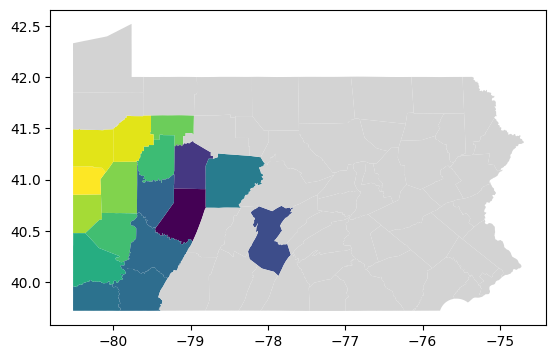

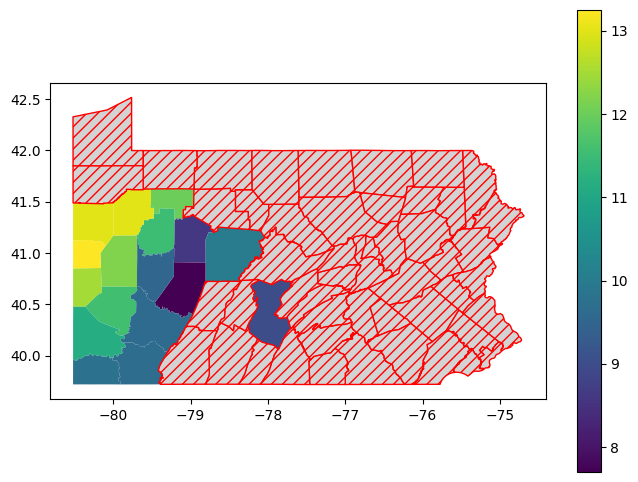

In [ ]:
PA.plot(column='Expected Snowfall', missing_kwds={'color': 'lightgrey'});

PA.plot(
    column="Expected Snowfall",
    legend=True,
    figsize=(8, 6),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);


I used both the grey scale and the red lines to show where it was not impacted by snowstorm.

# Step 8 : Travel Distances

In [ ]:
travel_towns = ['Pittsburgh',
                'Scranton',
                'Allentown',
                'Philadelphia',
                'Harrisburg',
                'Pittsburgh']


In [ ]:
# Read in the shapefile
travel_gdf = gpd.read_file("PaMunicipalities2022_01.shp")

travel_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can see that the Coordinate Operation is "Pseudo-Mercator", not regular longitude and latitude.

In [ ]:
# Create an orthogonal projection CRS
lat = centroid_y
lon = centroid_x
ortho = CRS.from_proj4("+proj=ortho +lat_0={} +lon_0={} +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs".format(lat, lon))

travel_gdf_ortho = travel_gdf.to_crs(ortho)



In [ ]:
# Create a Plate Carree (EPSG:4326) projection CRS
travel_gdf_plate_carree = travel_gdf.to_crs(epsg=4326)

# Add area and label coordinates to both GeoDataFrames
travel_gdf_ortho['Area'] = travel_gdf_ortho.geometry.area
travel_gdf_ortho['Label Coordinates'] = travel_gdf_ortho.geometry.centroid

travel_gdf_plate_carree['Area'] = travel_gdf_plate_carree.geometry.area
travel_gdf_plate_carree['Label Coordinates'] = travel_gdf_plate_carree.geometry.centroid

# Print the modified GeoDataFrames
print("Orthogonal Projection GeoDataFrame:")
print(travel_gdf_ortho.head())

print("\nPlate Carree Projection GeoDataFrame:")
print(travel_gdf_plate_carree.head())

Orthogonal Projection GeoDataFrame:
   MSLINK COUNTY MUNICIPAL_    MUNICIPAL1 FIPS_MUN_C FED_AID_UR FIPS_COUNT  \
0    2254     59        209  WEST BUFFALO      82640          1        119   
1    1258     21        203      HOPEWELL      35672          1        041   
2    2255     59        210    WHITE DEER      84496          2        119   
3     283     50        407   MILLERSTOWN      49720          1        099   
4    2278     60        219    SCRUBGRASS      69016          1        121   

  FIPS_AREA_ FIPS_NAME  FIPS_SQ_MI  ...  GIS_UPDATE GIS_GEOMET   GPID  \
0      00000      None        38.2  ...        None       None  33785   
1      00000      None        28.2  ...        None       None  33786   
2      50016    MILTON        30.6  ...        None       None  33787   
3      00000      None         1.2  ...        None       None  33788   
4      00000      None        27.4  ...        None       None  33789   

  GEOMETRY_A GEOMETRY_L    Shape_Leng    Shape_Area  \
0

<ipython-input-211-4ba757c85851>:8: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  travel_gdf_plate_carree['Area'] = travel_gdf_plate_carree.geometry.area
<ipython-input-211-4ba757c85851>:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  travel_gdf_plate_carree['Label Coordinates'] = travel_gdf_plate_carree.geometry.centroid


# Step 9 : Travel Distances

Plot the travel cities on a map of PA in the ortho coordinate system. You can do this just by overlaying the plots of the full PA geometry and the subset of the cities geometry containing only the four cities- the Jupyter Notebook with draw them together if they are created in the same block.

You can use the "color='colorname'" keyword argument to make their colors distinguishable.

Add arrows to the map showing the travel steps. You can use the representative_point() method, or the 'coords' attribute we defined from it.




In [ ]:
travel_gdf_ortho.head()

,MSLINK,COUNTY,MUNICIPAL_,MUNICIPAL1,FIPS_MUN_C,FED_AID_UR,FIPS_COUNT,FIPS_AREA_,FIPS_NAME,FIPS_SQ_MI,...,GIS_UPDATE,GIS_GEOMET,GPID,GEOMETRY_A,GEOMETRY_L,Shape_Leng,Shape_Area,geometry,Area,Label Coordinates
0,2254,59,209,WEST BUFFALO,82640,1,119,00000,None,38.2,...,None,None,33785,0.0,0.0,74680.772799,1.773021e+08,"MULTIPOLYGON (((68200.408 14594.480, 68239.960...",1.007855e+08,POINT (64768.546 10323.930)
1,1258,21,203,HOPEWELL,35672,1,041,00000,None,28.2,...,None,None,33786,0.0,0.0,55735.307406,1.241206e+08,"POLYGON ((30334.593 -86235.949, 30272.239 -862...",7.234607e+07,POINT (24099.464 -83084.095)
2,2255,59,210,WHITE DEER,84496,2,119,50016,MILTON,30.6,...,None,None,33787,0.0,0.0,63730.550468,2.107778e+08,"POLYGON ((82115.678 14453.824, 82099.510 14398...",1.195819e+08,POINT (74178.358 17555.976)
3,283,50,407,MILLERSTOWN,49720,1,099,00000,None,1.2,...,None,None,33788,0.0,0.0,10891.156452,4.335253e+06,"POLYGON ((59115.789 -38606.978, 59084.928 -386...",2.496928e+06,POINT (58085.874 -38264.426)
4,2278,60,219,SCRUBGRASS,69016,1,121,00000,None,27.4,...,None,None,33789,0.0,0.0,73267.778096,1.259692e+08,"POLYGON ((-156715.823 32394.438, -156724.954 3...",7.110443e+07,POINT (-162211.836 36431.242)


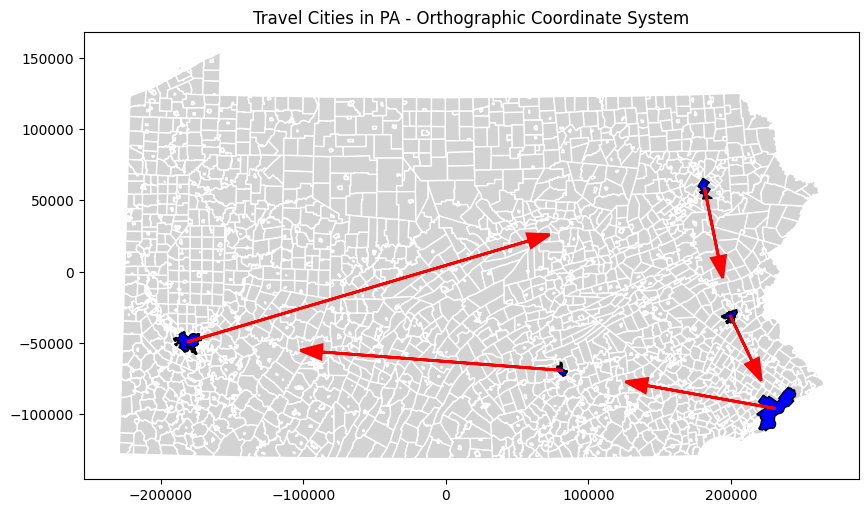

In [ ]:
from shapely.geometry import Point, LineString

fig, ax = plt.subplots(figsize=(10, 10))

# PA map
travel_gdf_ortho.plot(ax=ax, color='lightgray', edgecolor='white')

travel_towns = list(map(str.upper, travel_towns))

# Four travel cities
subset_cities = travel_gdf_ortho[travel_gdf_ortho['MUNICIPAL1'].isin(travel_towns)]
subset_cities.plot(ax=ax, color='blue', edgecolor='black', marker='o', markersize=50)

# Add arrows
for i in range(len(travel_towns) - 1):
    start_point = subset_cities[subset_cities['MUNICIPAL1'] == travel_towns[i]]['Label Coordinates'].values[0]
    end_point = subset_cities[subset_cities['MUNICIPAL1'] == travel_towns[i + 1]]['Label Coordinates'].values[0]
    arrow_line = LineString([start_point, end_point])
    arrow_coords = arrow_line.interpolate(0.7, normalized=True)
    ax.arrow(start_point.x, start_point.y, arrow_coords.x - start_point.x, arrow_coords.y - start_point.y,
             shape='full', lw=2, length_includes_head=True, head_width=10000, color='red')
# Not sure why the arrows are not to the full length

ax.set_title("Travel Cities in PA - Orthographic Coordinate System")
plt.show()


# Step 10 : Loop Distance

In [ ]:
ortho_distances = 0.0
for i in range(len(travel_towns) - 1):
    start_point = subset_cities[subset_cities['MUNICIPAL1'].str.strip().str.upper() == travel_towns[i]]['geometry'].iloc[0]
    end_point = subset_cities[subset_cities['MUNICIPAL1'].str.strip().str.upper() == travel_towns[i + 1]]['geometry'].iloc[0]
    ortho_distances += start_point.distance(end_point)

# Print total straight-line travel distance in orthographic projection
print(f"Total straight-line travel distance in orthographic projection: {ortho_distances:.2f} meters")

Total straight-line travel distance in orthographic projection: 885077.82 meters


This is now using the haversine distance function.

In [ ]:
haversine_distances = 0.0
for i in range(len(travel_towns) - 1):
    start_point = subset_cities[subset_cities['MUNICIPAL1'].str.strip().str.upper() == travel_towns[i]]['geometry'].iloc[0].representative_point()
    end_point = subset_cities[subset_cities['MUNICIPAL1'].str.strip().str.upper() == travel_towns[i + 1]]['geometry'].iloc[0].representative_point()

    # Calculate haversine distance using the haversine_np function
    haversine_distances += haversine_np(start_point.x, start_point.y, end_point.x, end_point.y)

# Print total haversine travel distance using haversine_np function
print(f"Total haversine travel distance using haversine_np: {haversine_distances:.2f} kilometers")


Total haversine travel distance using haversine_np: 45044.24 kilometers


The difference could be that I calculated it wrong, but also it could be the fundamental differences and errors caused by the attempt to calculate the distance in 3D spherical distance in 2D distance.